In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime
from dateutil import parser, rrule
from datetime import datetime, time, date
%matplotlib notebook
import scipy
from scipy import stats

### Import geospatial matching table between reservoirs and guages

In [2]:
near_table = pd.read_csv(os.path.join("..", "Data/GIS/Precip_gauges/ryan_gauges/Near_reservoirs", "Near_Output_w_meta.txt"))


In [3]:
Ry_data = pd.read_csv(os.path.join("..", "Data/External_data/Precip", "Ryan_data.csv"), index_col=0).transpose()
Ry_data

Date,MANUKA 2,KAHUKU MAUKA,SOUTH KONA 2 2.32,MILOLII 2.34,HONOMALINO 2.35,KAPUA 2.36,MAUKA RESERVOIR 3.11,HAWAIIAN OCEAN VIEW 4.7 NNE,CAPTAIN COOK 2.9 SSE,LOWER KAHUKU CS,...,PRINCEVILLE 0.8 ESE,PRINCEVILLE 2.4 SE,HanaleiRainGageatHanalei,KILAUEA 1134,KILAUEA 0.3 SE,KILAUEA 0.5 SE,KOLOKO RESERVOIR 113,ANAHOLA 2.8 N,MOLOAA 1145,Moloaa Dairy
X1990.01.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.964986,0.000000,0.614481,1.377819,...,7.324059,6.868415,7.059943,3.008330,8.465992,5.208367,2.500000,4.478952,4.346141,4.267199
X1990.01.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.462851,0.000000,0.250501,0.675549,...,5.993105,6.107983,6.919113,3.300000,6.882218,4.879798,3.279170,4.587381,4.502575,4.433736
X1990.01.03,0.200000,0.000000,0.000000,0.000000,0.000000,0.080700,0.000000,0.000000,0.000000,0.000000,...,4.473110,4.303098,4.511635,2.379170,5.154464,3.036621,1.262500,2.783468,2.680360,2.610568
X1990.01.04,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.725899,1.552746,1.511504,0.583333,2.001314,1.153893,0.441667,0.965154,0.930033,0.908417
X1990.01.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.135255,1.295679,1.680187,0.566667,1.295815,1.334903,1.420830,1.259251,1.272894,1.276278
X1990.01.06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.564143,0.594332,0.713380,0.233333,0.647908,0.571419,0.525000,0.509936,0.511785,0.512648
X1990.01.07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.574429,1.619808,1.780507,0.938258,1.799743,1.198828,0.708333,2.796972,2.715306,2.361416
X1990.01.08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.942564,0.931947,0.965740,0.508908,1.079846,0.650239,0.291667,1.503359,1.454390,1.261477
X1990.01.09,0.533333,0.000000,0.000000,0.000000,0.000000,0.215200,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
X1990.01.10,0.266667,0.000000,0.000000,0.000000,0.000000,0.107600,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Import and clean precip data

In [4]:
Ry_data = pd.read_csv(os.path.join("..", "Data/External_data/Precip", "Ryan_data.csv"), index_col=0).transpose()
Ry_data = Ry_data.reset_index()

Ry_data['index'] = Ry_data['index'].astype(str)
Ry_data['index'] = Ry_data['index'].apply(lambda x: x[1:])  # Pull out the X
Ry_data['index'] = pd.to_datetime(Ry_data['index'], yearfirst=True).dt.strftime("%Y-%m-%d")
Ry_data.set_index("index", inplace=True)

raindata_clipped = Ry_data.loc["2017-01-01":]
raindata_clipped.head()

Date,MANUKA 2,KAHUKU MAUKA,SOUTH KONA 2 2.32,MILOLII 2.34,HONOMALINO 2.35,KAPUA 2.36,MAUKA RESERVOIR 3.11,HAWAIIAN OCEAN VIEW 4.7 NNE,CAPTAIN COOK 2.9 SSE,LOWER KAHUKU CS,...,PRINCEVILLE 0.8 ESE,PRINCEVILLE 2.4 SE,HanaleiRainGageatHanalei,KILAUEA 1134,KILAUEA 0.3 SE,KILAUEA 0.5 SE,KOLOKO RESERVOIR 113,ANAHOLA 2.8 N,MOLOAA 1145,Moloaa Dairy
index,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,2.183418,1.074062,0.408497,0.0,0.0,0.0,0.5,0.0,0.000000,0.000000
2017-01-02,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.450338,...,0.000000,0.000000,0.059070,0.0,0.0,0.0,0.0,0.0,8.100000,6.275225
2017-01-03,0.0,0.0,0.0,0.5,1.584936,6.1,0.0,0.0,0.3,0.000000,...,0.000000,0.000000,5.596991,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2017-01-04,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,8.379885,10.668105,15.456731,5.1,3.6,3.8,6.9,0.8,1.487948,1.954347
2017-01-05,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,4.264508,5.956313,1.928558,8.4,21.3,21.8,22.1,6.1,7.798315,9.014702


### Import in reservoir data and resample

In [5]:
# Create a metadata describe frame for the Reservoir data 

station_id = []; datemin = []; datemax = []; datamean = []
datamedian = []; datamax= []; datamin=[]


for file in os.listdir(os.path.join("..", "Data/Processed")):
    data = pd.read_csv(os.path.join("..", "Data/Processed", file), parse_dates=['date'])
    data = data.replace(-66577, np.nan)
    
    station_id.append(file.split(".")[0])
    datemin.append(data['date'].min())
    datemax.append(data['date'].max())
    datamean.append(data['data'].describe()[1])
    datamedian.append(data['data'].describe()[5])
    datamin.append(data['data'].describe()[3])
    datamax.append(data['data'].describe()[7])
    
data_describe = pd.DataFrame({'station_id':station_id, 
              "date_min":datemin,
              "date_max":datemax ,
              "mean_WL":datamean ,
              "median_WL": datamedian,
              "min_WL":datamin ,
              "max_WL":datamax           
             })

data_describe.to_csv("data_describe_stats.csv")

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data_describe.head()

,station_id,date_min,date_max,mean_WL,median_WL,min_WL,max_WL
0,WL_EDD00214,2018-12-31 22:09:00,2022-03-23 18:04:00,1484.265880,1475.0,1315.0,1907.0
1,WL_EDD00CC6,2018-12-31 22:09:00,2022-03-23 18:04:00,878.638709,829.0,-125738.0,131071.0
2,WL_EDD01FB0,2021-03-16 19:09:00,2021-07-27 18:04:00,2373.487317,2032.0,1926.0,4568.0
3,WL_EDD024F8,2018-12-31 22:09:00,2022-03-23 18:04:00,38163.755282,38138.0,-92938.0,59639.0
4,WL_EDD02A2A,2018-12-31 22:09:00,2022-03-23 18:04:00,96783.423337,97217.0,-74419.0,131071.0


##### Inport the reservoir data

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


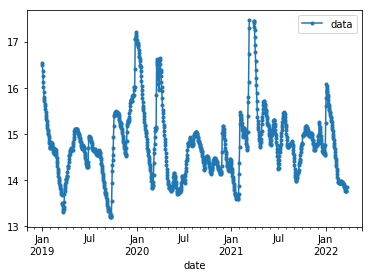

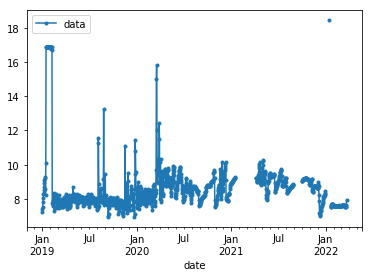

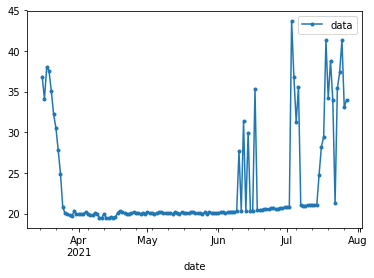

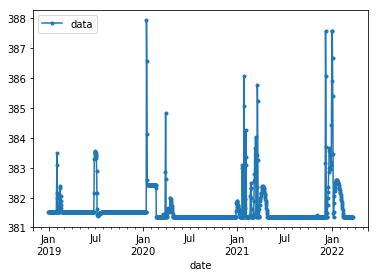

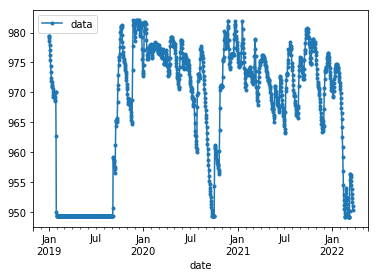

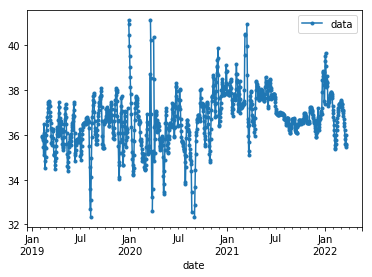

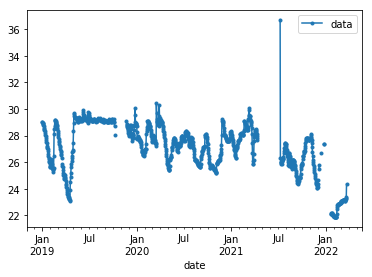

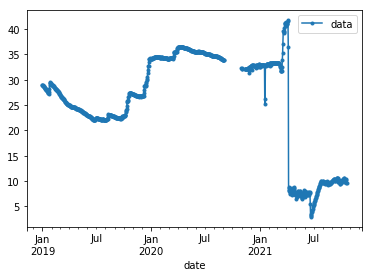

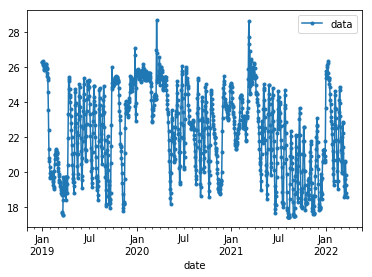

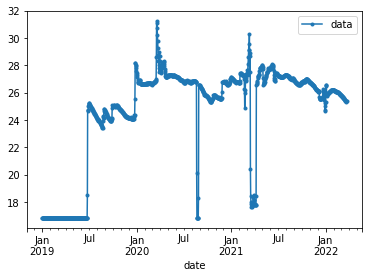

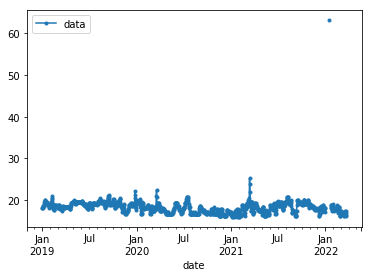

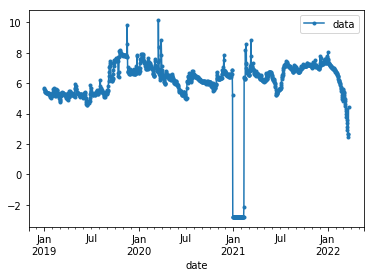

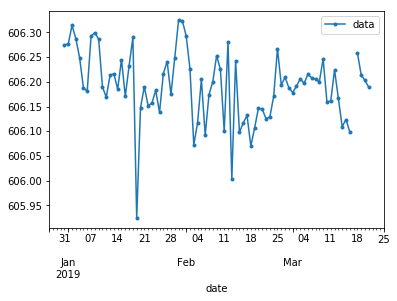

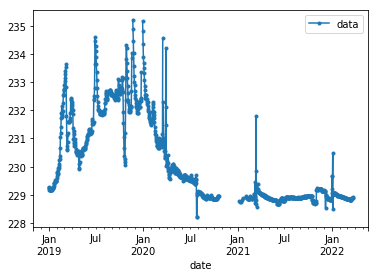

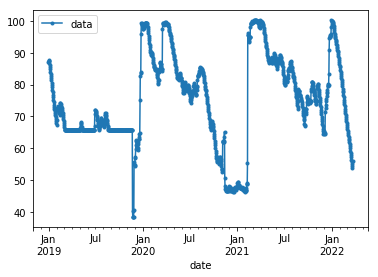

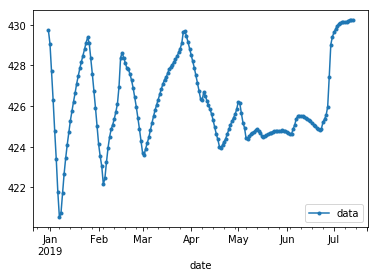

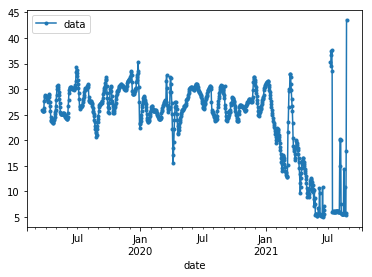

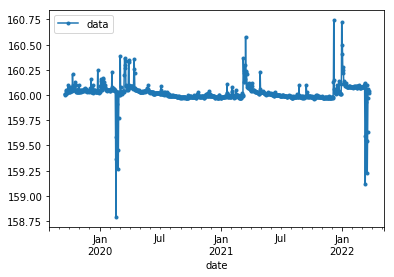

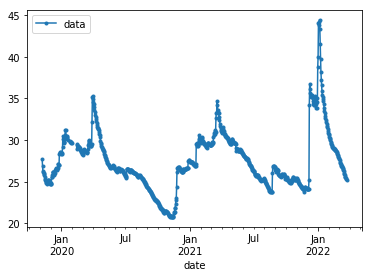

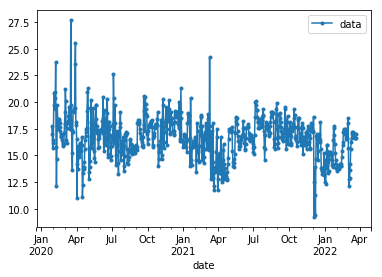

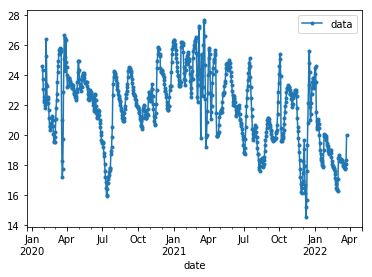

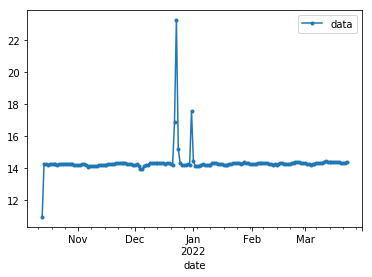

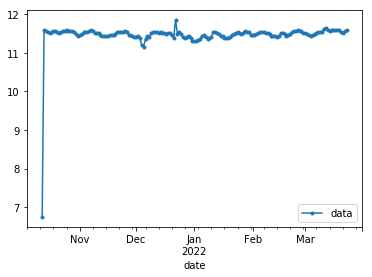

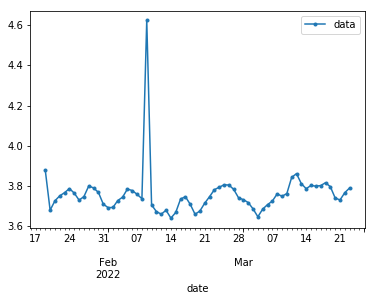

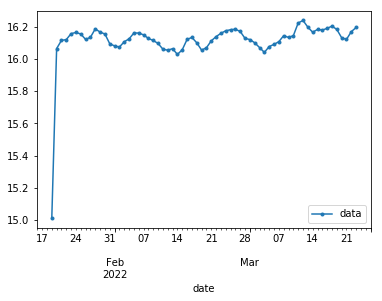

In [7]:
daily_dic = {}

for file in os.listdir(os.path.join("..", "Data/Processed")):
    data = pd.read_csv(os.path.join("..", "Data/Processed", file), parse_dates=['date'])
    data = data.replace(-66577, np.nan)
    
    # Remove outliers based on a certain number of standard deviations from the mean 
    # Probably could use a more advanced filtering method later if need
    STDs = 3
    data = data[((data['data'] - data['data'].mean()) / data['data'].std()).abs() < STDs]
    
    # Convert from decimal feet to ft. 
    data['data'] = data['data']/100
    
    #resample data to daily 
    data = data.set_index("date")
    data_daily =  data.resample('D').mean() 
    
    # record daily files in a dictionary of dataframes
    daily_dic[file] = data_daily
    
    # Plot if want 
    data_daily.plot( y='data', marker='.')
    

### Start matching datasets up

IndexError: single positional indexer is out-of-bounds

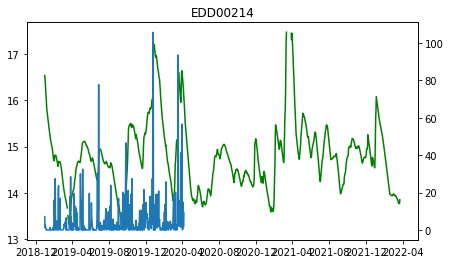

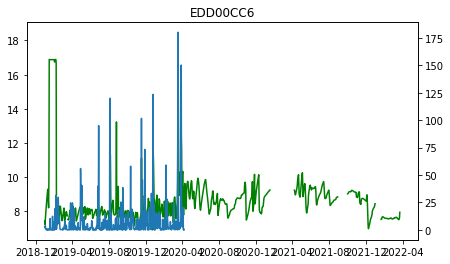

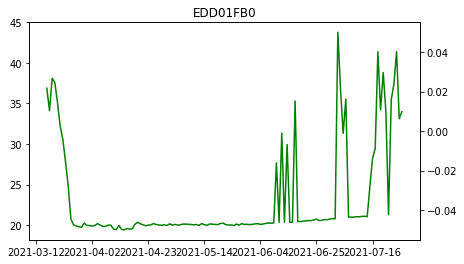

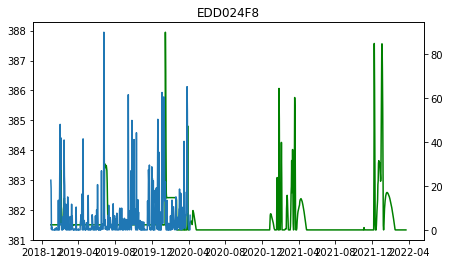

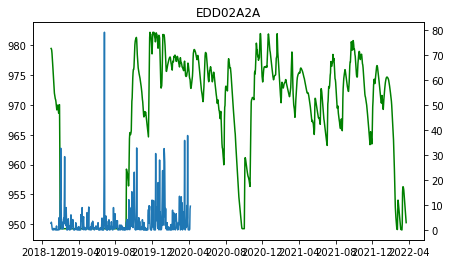

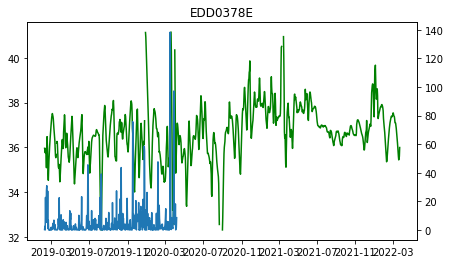

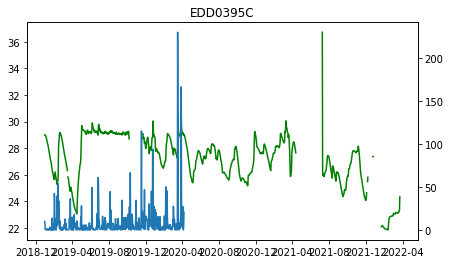

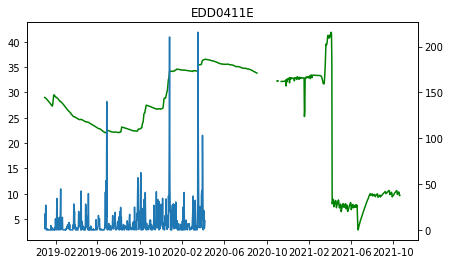

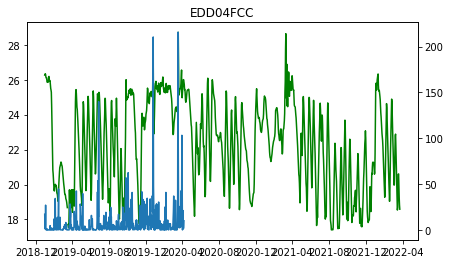

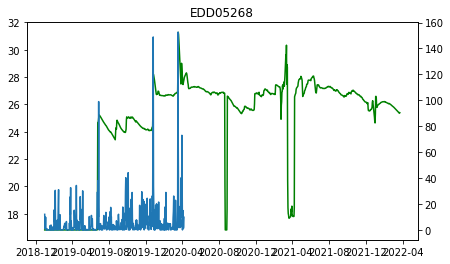

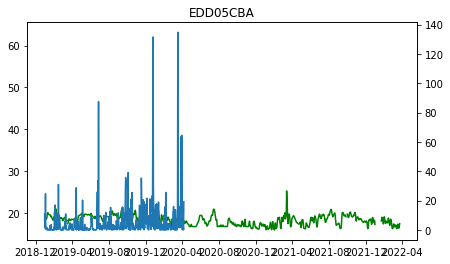

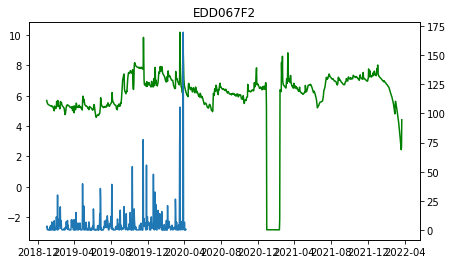

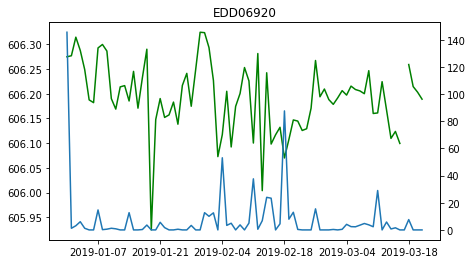

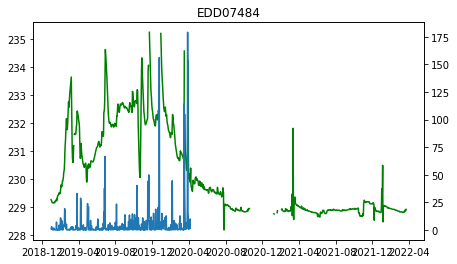

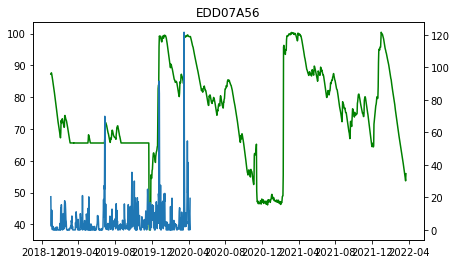

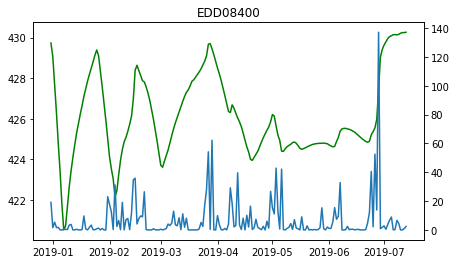

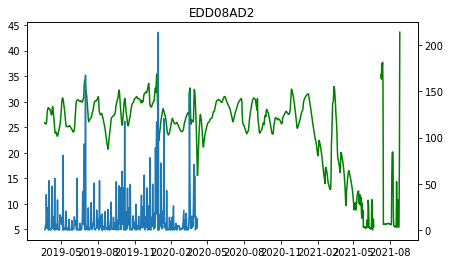

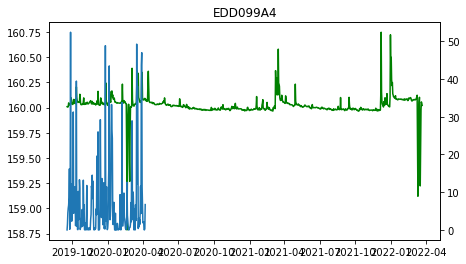

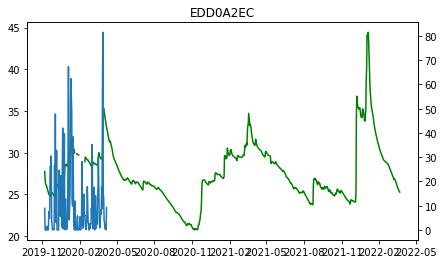

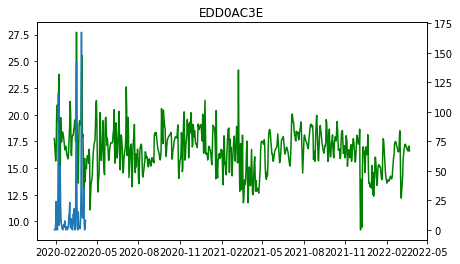

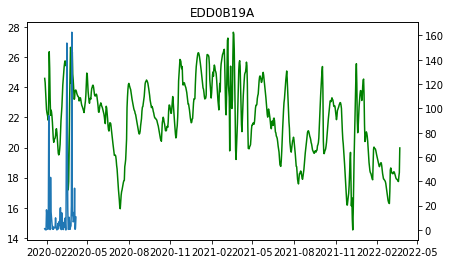

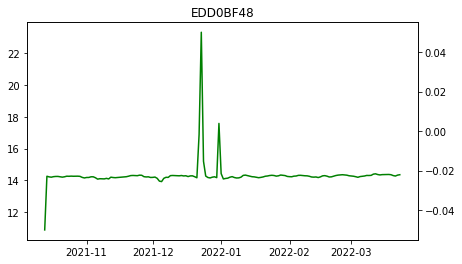

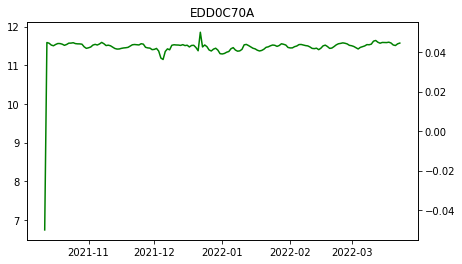

In [8]:
# Reformat gauge names for use in loop below
gauge_list = []
for i in list(daily_dic.keys()):
    val = i[3:11]
    gauge_list.append(val)


daily_rain_dic = {}
for gauge in gauge_list:
        # Select individual reservoir gauge
        res_id = gauge
        daily_WL_data = daily_dic["WL_"+res_id+'.csv']

        # Create a list of the rainfall stations that are near the gauge
        want_cols = ['NEAR_DIST', 'NEAR_RANK', 'Station_Na', 'Island', 'ELEV_m_']  # remove some erronious columns
        near_staions_list = near_table[near_table['id'] == res_id][want_cols]

        # Find the closest station and pull out the data as a series
        closest_station = near_staions_list.iloc[0]['Station_Na']
        closest_station_rain_series = raindata_clipped[closest_station]
        closest_station_rain_series.name = "closestPrecip"

        # Average rainfall from the nearest 10 rain stations and pull out the data as a series
        nearest10_rain = raindata_clipped[list(near_staions_list.iloc[0:10]['Station_Na'])]
        nearest10_meanPrecip = nearest10_rain.mean(axis=1)
        nearest10_meanPrecip.name = "near10Precip"

        # Average rainfall from the nearest 3 rain stations and pull out the data as a series
        nearest3_rain = raindata_clipped[list(near_staions_list.iloc[0:3]['Station_Na'])]
        nearest3_meanPrecip = nearest3_rain.mean(axis=1)
        nearest3_meanPrecip.name = "near3Precip"

        daily_WL_data = daily_WL_data.join(closest_station_rain_series)
        daily_WL_data = daily_WL_data.join(nearest3_meanPrecip)
        daily_WL_data = daily_WL_data.join(nearest10_meanPrecip)
        
        daily_rain_dic[gauge] = daily_WL_data


        # Plot both
        fig, ax = plt.subplots(figsize = (7,4))
        plt.title(res_id)
        ax2=ax.twinx()
        ax.plot(daily_WL_data['data'], 'g')
        ax2.plot(daily_WL_data['closestPrecip'])


In [ ]:
# Some more in depth analysis 

analysis_dic ={}
for gage in daily_rain_dic: 
    daily_WL_data = daily_rain_dic[gage]

    RolSumPcp = 2
    deltaWL = 1
    
    #Calculate the 1 day change in water level 
    daily_WL_data['ResLevelDelta_1d'] = daily_WL_data['data'].diff(periods=deltaWL)

    # Calculate rolling sums of precip
    daily_WL_data['2drollingPrecip'] = daily_WL_data['closestPrecip'].rolling(RolSumPcp).sum()

    analysis_dic[gage] = daily_WL_data

In [ ]:
analysis_dic.keys()

In [ ]:
def function(deltaWL, RolSumPcp):
    
    x = daily_WL_data['closestPrecip'].rolling(RolSumPcp).sum().values
    y = daily_WL_data['data'].diff(periods=deltaWL).values

    mask = ~np.isnan(x) & ~np.isnan(y) # regression does not like NaN values, this line masks them out and regression is only performed on finite numbers
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[mask], y[mask])   # calculate regression stats for the ecoli and rainfall data
    rmse = np.sqrt(np.mean(np.abs(x-y)**2))
    r2 = r_value**2
    rX = np.linspace(0,330,50)#min(x), max(x), 50)
    rY = slope*rX + intercept
    
    return x, y, rX, rY, r2, slope, rmse

### Some thoughts
The cell below shows some responsiveness by some reservoirs to 2 day rollojg sum rainfall events on their 2 day moving water levels. r2 often hover in the teens or 20s for more responsive ones, and are 0 for others. 
THis suggests that heavy rain events probably accoint for a max of 20-30% of the variability in the res levels, and that other factors, I assume management?  Accouints for the other ones. 

Need to answer:
- which reservoirs are managed?  And how? 
- how much of this data is suspect? 
- do we have a good indication of the base level of reservoirs?  How deep are the transducers? 
- What about the top out levels, which have spillways? and at what elevations?

EDD01FB0 is lame for some reason


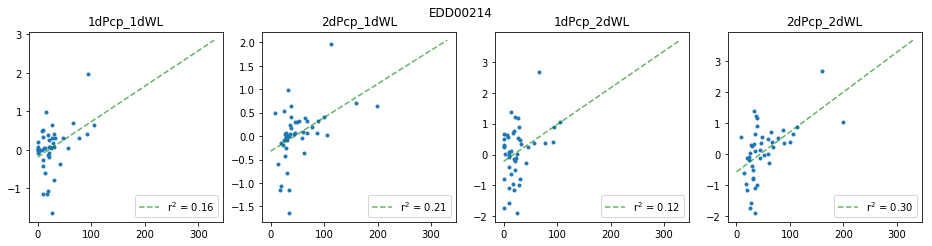

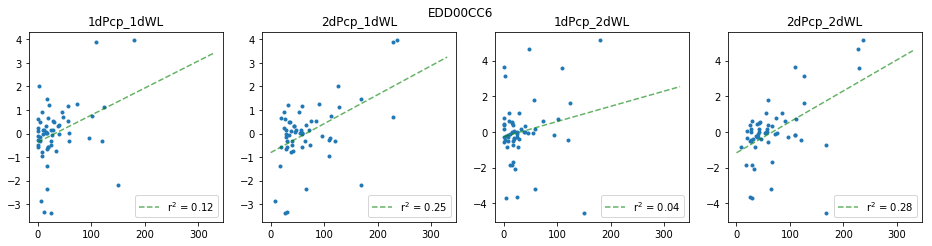

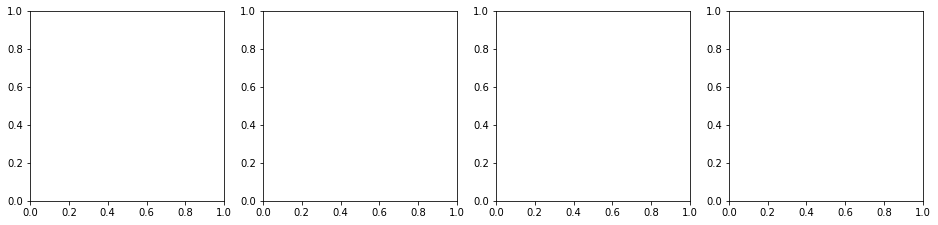

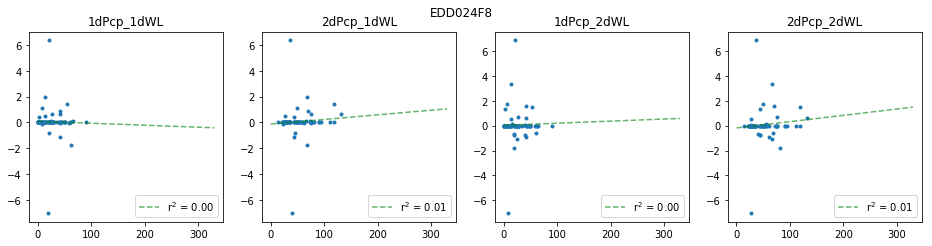

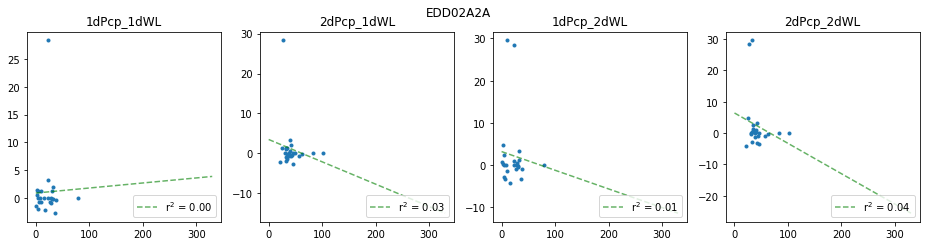

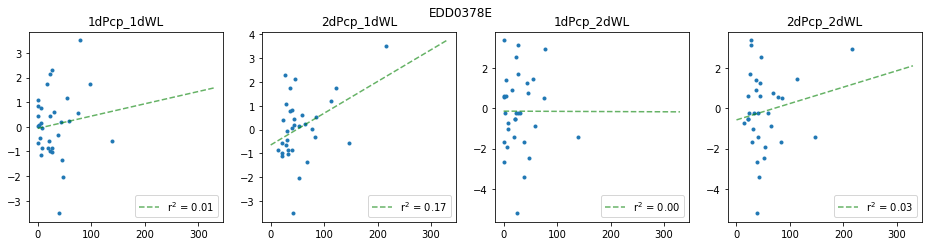

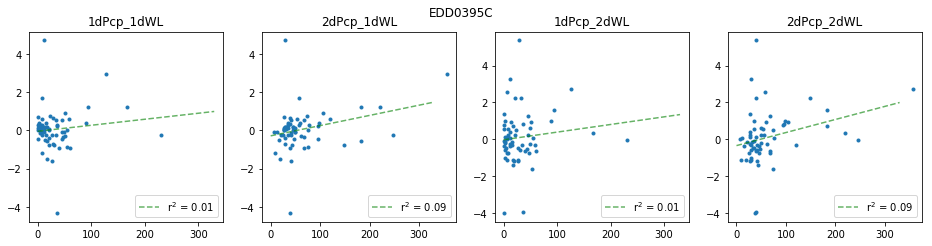

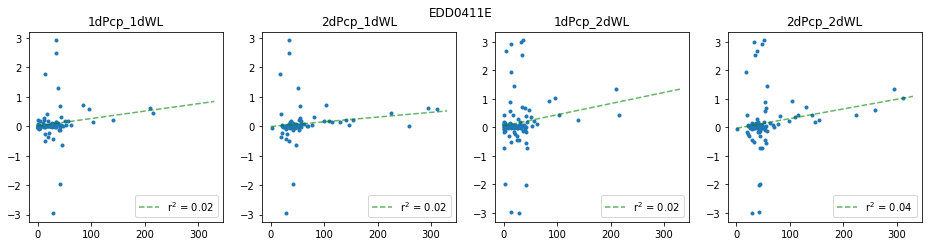

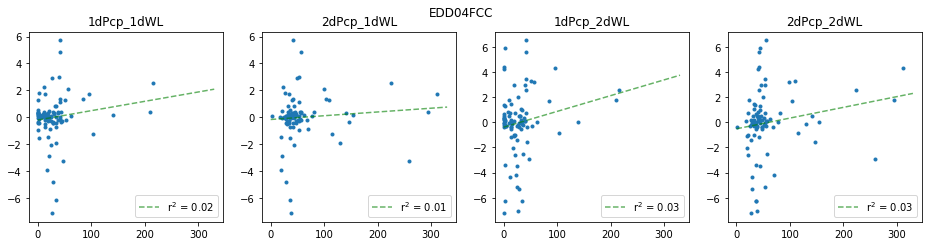

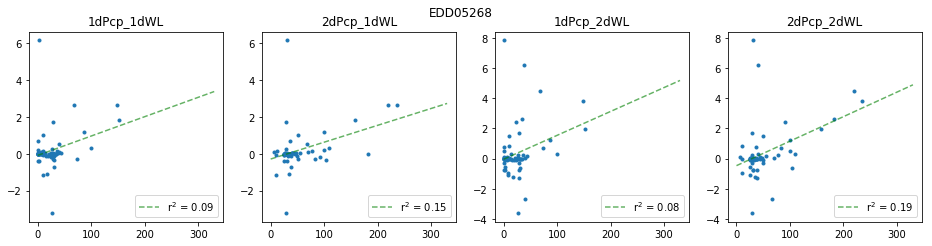

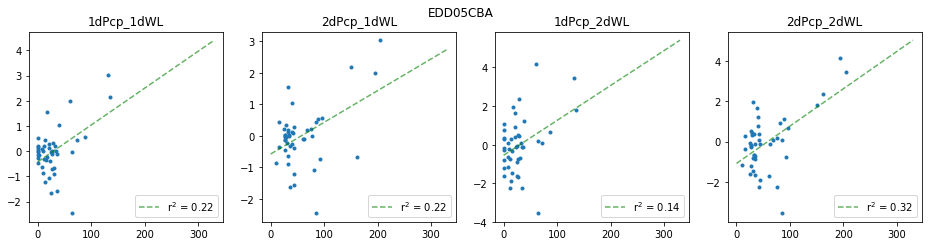

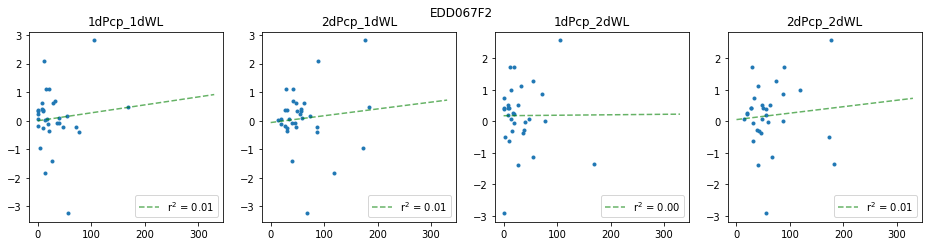

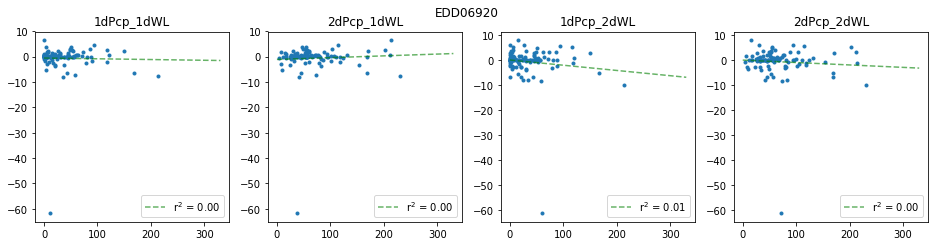

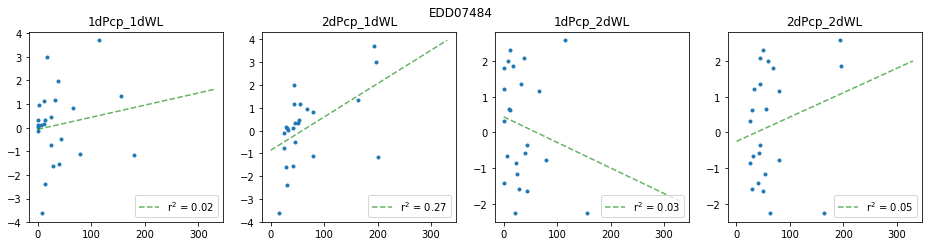

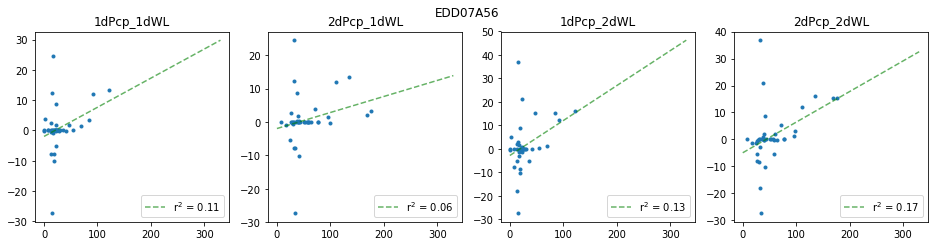

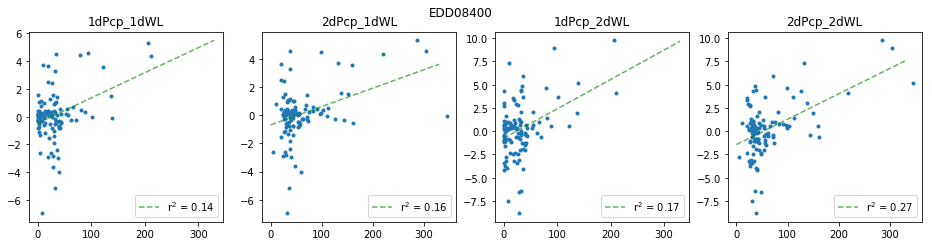

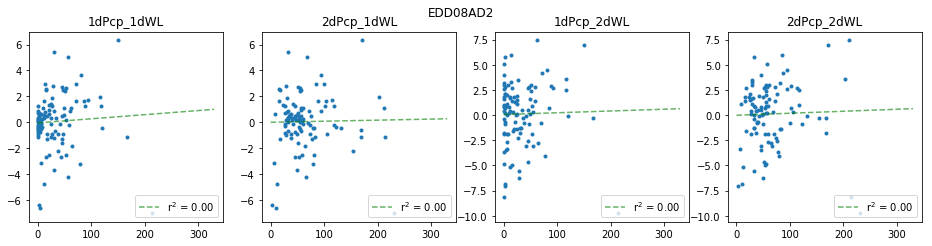

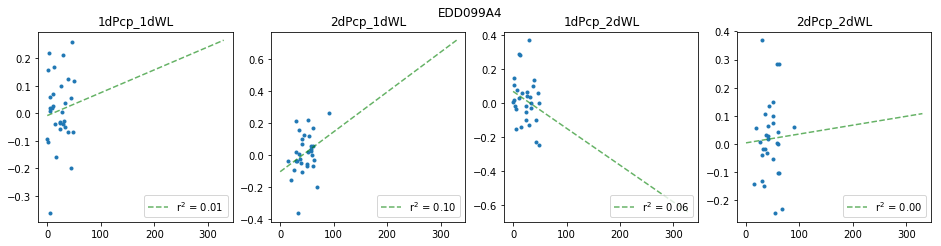

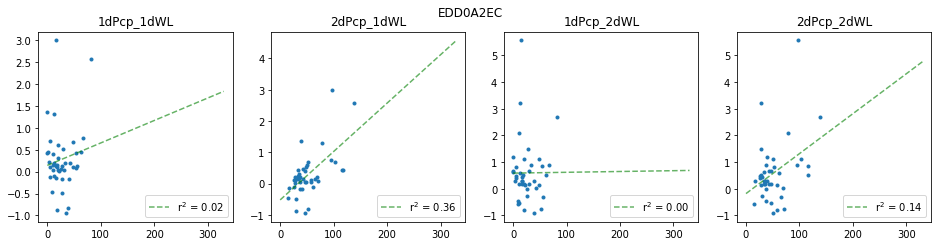

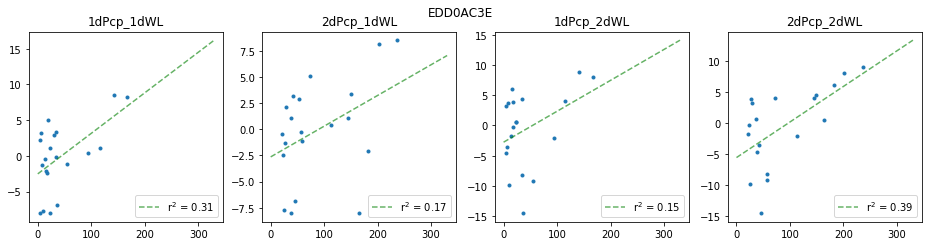

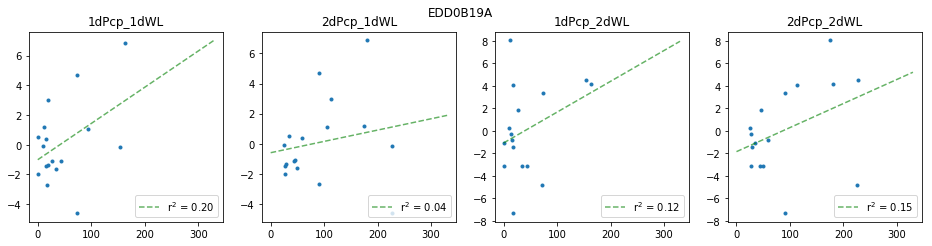

In [20]:
%matplotlib inline

RolSumPcp_lst = [1,2,1,2]
deltaWL_lst =   [1,1,2,2]

for gage in analysis_dic.keys():
    
    try: 
        daily_WL_data = analysis_dic[gage]

        # exclude data points without much rain in last few days
        pcp_thresh = 25
        daily_WL_data = daily_WL_data[daily_WL_data['2drollingPrecip'] > pcp_thresh]

        fig, ax = plt.subplots(1,4,figsize = (16,3.5))


        for idx, val in enumerate(RolSumPcp_lst):
            x, y, rX, rY, r2, slope, rmse = function(deltaWL_lst[idx], RolSumPcp_lst[idx])

            ax[idx].plot(x, y, linestyle="", marker=".")
            ax[idx].plot(rX, rY, color='g', linestyle='--', alpha = .6, label = ("r$^2$ = " + "$%.2f$"%r2))# +",\n Slope="+"$%.2f$"%slope)) 
            ax[idx].legend(loc=4) 
            ax[idx].set_title("{}dPcp_{}dWL".format(str(RolSumPcp_lst[idx]), str(deltaWL_lst[idx])))

        fig.suptitle("{}".format(gage))

    except:print("{} is lame for some reason".format(gage))


### Super cool now start to interact with plots

<IPython.core.display.Javascript object>


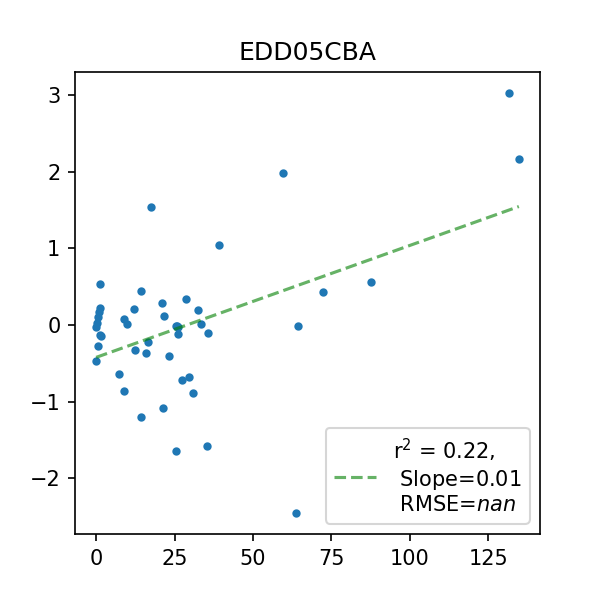

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.update(deltaWL=(1, 5, 1), RolSumPcp=(1, 5, 1))>

In [210]:
gage_name = 'EDD05CBA'
daily_WL_data = analysis_dic[gage_name]


RolSumPcp=1
deltaWL =1
pcp_thresh = 25

daily_WL_data = daily_WL_data[daily_WL_data['2drollingPrecip'] > pcp_thresh]


fig, ax = plt.subplots(figsize = (4,4))
x, y, rX, rY, r2, slope, rmse = function(deltaWL, RolSumPcp)
dots, = ax.plot(x, y, linestyle="", marker=".")
line, = ax.plot(rX, rY, color='g', linestyle='--', alpha = .6, label = ("r$^2$ = " + "$%.2f$"%r2 +",\n Slope="+"$%.2f$"%slope +"\n RMSE="+"$%.2f$"%rmse)) 
plt.legend(loc=4) 
plt.title(gage_name)


def update(deltaWL=(1,5,1), RolSumPcp=(1,5,1)):
    dots.set_xdata(function(deltaWL, RolSumPcp)[0])
    dots.set_ydata(function(deltaWL, RolSumPcp)[1])
    #line.set_xdata(function(deltaWL, RolSumPcp)[2])
    #line.set_ydata(function(deltaWL, RolSumPcp)[3])
    fig.canvas.draw_idle()
    
interact(update)



In [207]:
analysis_dic['EDD04FCC']

,bv,data,txtype,closestPrecip,near3Precip,near10Precip,ResLevelDelta_1d,2drollingPrecip
date,,,,,,,,
2018-12-31,13.334875,26.267500,1.000000,17.010956,14.063340,9.737209,NaN,NaN
2019-01-01,12.746621,26.307042,1.012225,1.123354,1.071289,1.120183,0.039542,1.813431e+01
2019-01-02,12.815669,26.344085,1.012531,5.497512,3.913908,2.424696,0.037044,6.620866e+00
2019-01-03,12.774073,26.291974,1.012987,27.041347,19.391905,12.641252,-0.052111,3.253886e+01
2019-01-04,12.787959,26.151117,1.000000,1.774904,1.332999,0.980130,-0.140857,2.881625e+01
2019-01-05,12.784982,26.110327,1.012594,0.000000,0.000000,0.066963,-0.040789,1.774904e+00
2019-01-06,12.776744,26.111705,1.012920,0.000000,0.000000,0.200889,0.001378,3.330669e-15
2019-01-07,12.741951,25.986469,1.013477,1.359194,1.244832,0.912831,-0.125236,1.359194e+00
2019-01-08,12.810553,25.868794,1.011820,0.160040,0.082323,0.069356,-0.117675,1.519234e+00


In [ ]:
gage_name = 'EDD01FB0'
daily_WL_data = analysis_dic[gage_name]


RolSumPcp=1
deltaWL =1

def function(deltaWL, RolSumPcp):
    x = daily_WL_data['closestPrecip'].rolling(RolSumPcp).sum().values
    y = daily_WL_data['data'].diff(periods=deltaWL).values

    mask = ~np.isnan(x) & ~np.isnan(y) # regression does not like NaN values, this line masks them out and regression is only performed on finite numbers
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[mask], y[mask])   # calculate regression stats for the ecoli and rainfall data
    rmse = np.sqrt(np.mean(np.abs(x-y)**2))
    r2 = r_value**2
    rX = np.linspace(min(x), max(x), 50)
    rY = slope*rX + intercept
    
    return x, y, rX, rY


fig, ax = plt.subplots(figsize = (4,4))
x, y, rX, rY = function(deltaWL, RolSumPcp)
dots, = ax.plot(x, y, linestyle="", marker=".")
line, = ax.plot(rX, rY, color='g', linestyle='--', alpha = .6)# label = ("r$^2$ = " + "$%.2f$"%r2 +",\n Slope="+"$%.2f$"%slope +"\n RMSE="+"$%.2f$"%rmse) 
plt.legend(loc=2) 
plt.title(gage_name)


def update(deltaWL=(1,5,1), RolSumPcp=(1,5,1)):
    dots.set_xdata(function(deltaWL, RolSumPcp)[0])
    dots.set_ydata(function(deltaWL, RolSumPcp)[1])
    #line.set_xdata(function(deltaWL, RolSumPcp)[2])
    #line.set_ydata(function(deltaWL, RolSumPcp)[3])
    fig.canvas.draw_idle()
    
interact(update)



In [ ]:
gage_name = 'EDD01FB0'
daily_WL_data = analysis_dic[gage_name]


RolSumPcp=1
deltaWL =1

def function(deltaWL, RolSumPcp):
    x = daily_WL_data['closestPrecip'].rolling(RolSumPcp).sum().values
    y = daily_WL_data['data'].diff(periods=deltaWL).values   
    return x, y


fig, ax = plt.subplots(figsize = (4,4))
x, y = function(deltaWL, RolSumPcp)
dots, = ax.plot(x, y, linestyle="", marker=".")
plt.title(gage_name)


def update(deltaWL=(1,5,1), RolSumPcp=(1,5,1)):
    dots.set_xdata(function(deltaWL, RolSumPcp)[0])
    dots.set_ydata(function(deltaWL, RolSumPcp)[1])
    fig.canvas.draw_idle()
    
interact(update)

